# InfoPillar Solution - Machine Learning Virtual Internship Program


# Task 1: Loan Prediction using Machine Learning


Done by : Padma Priya T R

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_train = pd.read_csv('Loan_train.csv')

In [10]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df_train.shape

(614, 13)

In [14]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True) 
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
print(train.shape)

(614, 636)


<AxesSubplot:>

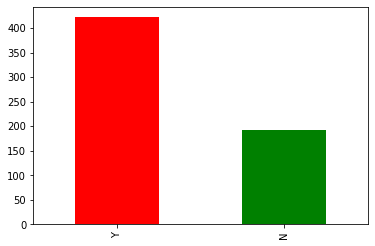

In [17]:
df_train["Loan_Status"].value_counts().plot.bar(color=["red","green"])

In [18]:
(df_train["Loan_Status"]=="Y").value_counts()

True     422
False    192
Name: Loan_Status, dtype: int64

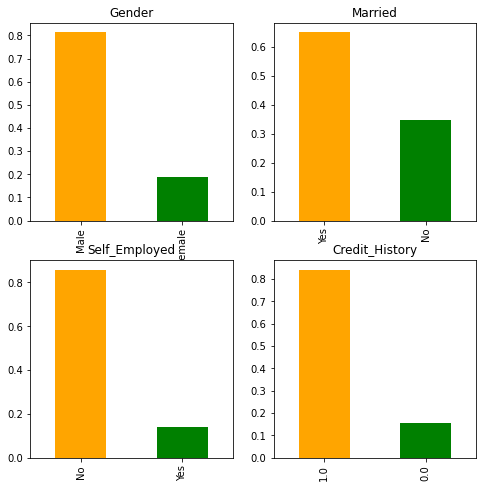

In [23]:
plt.figure(1)
plt.subplot(221)
df_train["Gender"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Gender",color=["orange","green"])
plt.subplot(222)
df_train["Married"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Married",color=["orange","green"])
plt.subplot(223)
df_train["Self_Employed"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Self_Employed",color=["orange","green"])
plt.subplot(224)
df_train["Credit_History"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Credit_History",color=["orange","green"])
plt.show()

<AxesSubplot:title={'center':'Property_Area'}>

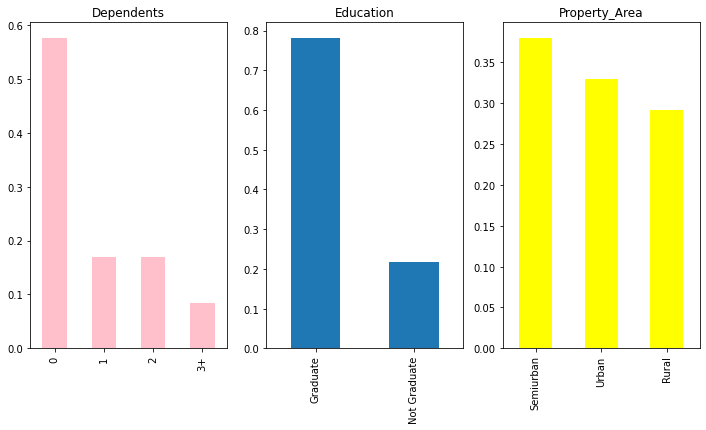

In [24]:
plt.figure(1)
plt.subplot(131)
df_train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="pink",title="Dependents")
plt.subplot(132)
df_train["Education"].value_counts(normalize=True).plot.bar(figsize=(12,6),title="Education")
plt.subplot(133)
df_train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="yellow",title="Property_Area")

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


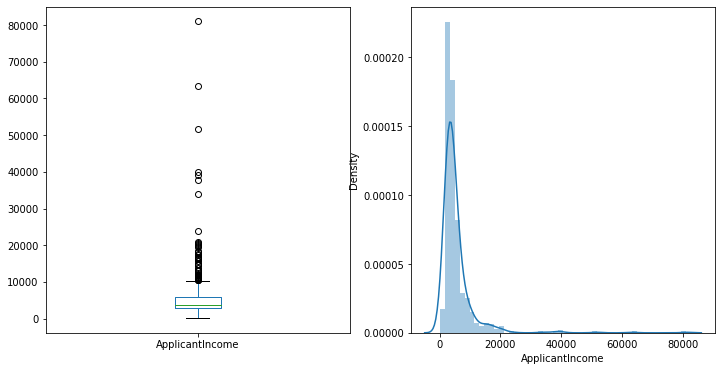

In [27]:
plt.figure(1)
plt.subplot(121)
df_train["ApplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(df_train["ApplicantIncome"])
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

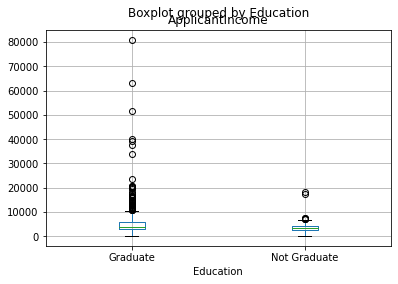

In [28]:
df_train.boxplot(column='ApplicantIncome', by = 'Education')

In [36]:
X = df_train.iloc[:,:-1]
Y = df_train.iloc[:,-1]

In [37]:
X =pd.get_dummies(X) 
train=pd.get_dummies(df_train) 
test=pd.get_dummies(df_test)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3) 
pipeline=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [60]:
predict_train=pipeline.predict(x_train)
predict_test=pipeline.predict(x_cv)

In [67]:
pipeline.score(x_cv, y_cv)

0.9513513513513514

# Thankyou